# Projeto Final Disciplina de Estatística - UFAL 2022.2
Alunos:<br>
FRANCISCO RACKLYN SOTERO DOS SANTOS - 21110615 <br>
LUCAS BARBOSA LEITE SILVA - 21110616<br>
CAYO NIKOLAS FERREIRA SANTOS - 21110619<br>

## Entendendo o problema

### Hipóteses:
* O número de quartos influencia mais no preço da casa do que o número de banheiros?
* A população que mora na área influencia no preço da casa?
* A renda das pessoas influencia na idade das casas?
* New York é um dos estados mais caros para se viver


**É necessário instalar as bibliotecas: matplotlib, plotly, seaborn, pandas, numpy**

## Importação e Visualização dos Dados

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as ex
import seaborn as sns
import numpy as np

In [46]:
tabela = pd.read_csv('USA_Housing.csv')

In [47]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


### Entendendo as colunas no dataset:
O data set possui as seguintes colunas:
- Avg. Area Income: Média do salário das pessoas residentes naquela área.
- Avg. Area House Age: Média de idade das casas naquela região.
- Avg. Area Number of Rooms: Média do número de quartos por casa.
- Avg. Area Number of Bedrooms: Média do número de banheiros por casa.
- Area Population : População ou pessoas residentes naquela área.
- Price: Preço das casas.
- Address: Uma única linha contendo o endereço das .

In [48]:
tabela.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## Tratamento dos Dados

In [49]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


Não temos nenhum dado nulo e todos os tipos de dados estão corretos.

Para facilitar a manipulação dos preços das casas, vamos normalizar os valores para 4 casas decimais:

In [40]:
for i, p in enumerate(tabela['Price']):
    tabela.at[i,'Price'] = round(p,2)
    

tabela['Price']

0       1059033.0
1       1505890.0
2       1058987.0
3       1260616.0
4        630943.0
          ...    
4995    1060193.0
4996    1482617.0
4997    1030729.0
4998    1198656.0
4999    1298950.0
Name: Price, Length: 5000, dtype: float64

In [50]:
tabela

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


Criando uma nova coluna com as siglas dos estados:

In [51]:
tabela['ACRON'] = [x.split()[-2]for x in tabela['Address']]

In [52]:
tabela.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,ACRON
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",NE
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",CA
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",WI
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,AP
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,AE


Removendo a coluna de Enderço, pois não será mais necessária.

In [53]:
tabela = tabela.drop('Address', axis=1)

In [54]:
tabela.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,ACRON
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,NE
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,CA
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,WI
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,AP
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,AE


## Descrição dos Dados

A seguir estamos chamando a função **describe( )** que apresenta, para todas as colunas com valor numérico de nosso dataFrame, as seguintes métricas:
* count: contagem dos dados na coluna
* mean: média dos valores da coluna
* std: desvio padrão dos valores da coluna
* min: valor mínimo da coluna
* 25%: quartil inferior
* 50%: mediana
* 75%: quartil superior
* max: valor máximo da coluna

In [37]:
tabela.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232072e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593800e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975765e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469065e+06


Exibindo média dos preços:

In [ ]:
tabela['Price'].mean()

Abaixo estamos mostrando histogramas para cada uma das colunas numéricas do dataset.<br>
O histograma é um tipo de gráfico que apresenta a quantidade de ocorrências dos valores em conjunto de dados.<br><br>
Estamos restringindo a exibição do histograma a 100 instâncias dos valores de cada coluna.

In [79]:
for coluna in tabela.columns:
    grafico = ex.histogram(tabela, x=coluna, text_auto=True, nbins=100)
    grafico.show()

Por fim, a seguir estamos criando mais um histograma com a média dos preços das casas existentes no dataset em cada um dos estados:

In [78]:
media_estados = tabela.groupby('ACRON').mean().reset_index().sort_values('Price', ascending = False)
ex.bar(media_estados, x='ACRON', y='Price', title='Média do preço das casas por Estado').show()

## Análise de Correlação

De início, podemos visualizar o mapa de calor das correlações:

[]

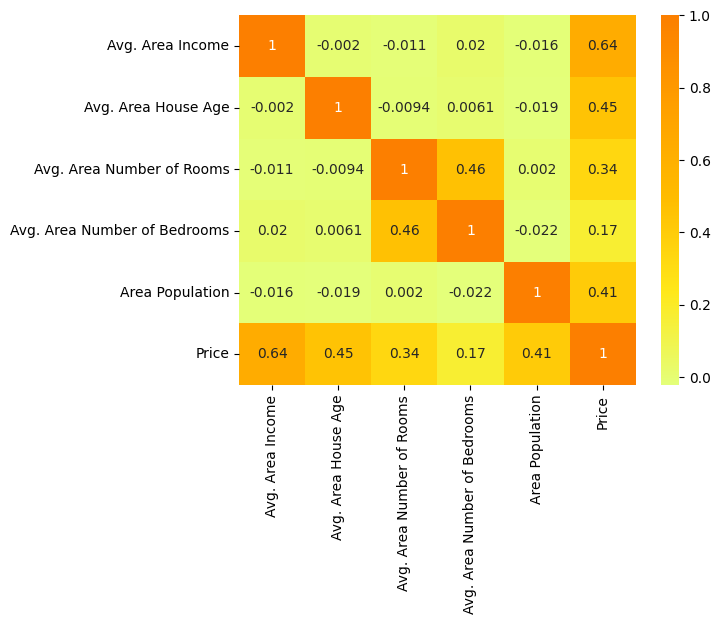

In [74]:
sns.heatmap(tabela[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms','Area Population','Price']].corr(), annot=True, cmap="Wistia")
plt.plot()

In [65]:
def calculaClasseCorrelacao(r):
    if(r>=0 and r<=0.1):
        return "MUITO BAIXA. r: "+str(r)
    elif(r>0.1 and r<=0.3):
        return "BAIXA. r: "+str(r)
    elif(r>0.3 and r<=0.5):
        return "MODERADA. r: "+str(r)
    elif(r>0.5 and r<=0.7):
        return "ALTA. r: "+str(r)
    elif(r>0.7 and r<=0.9):
        return "MUITO ALTA. r: "+str(r)
    elif(r>0.9):
        return "QUASE PERFEITA. r: "+str(r)

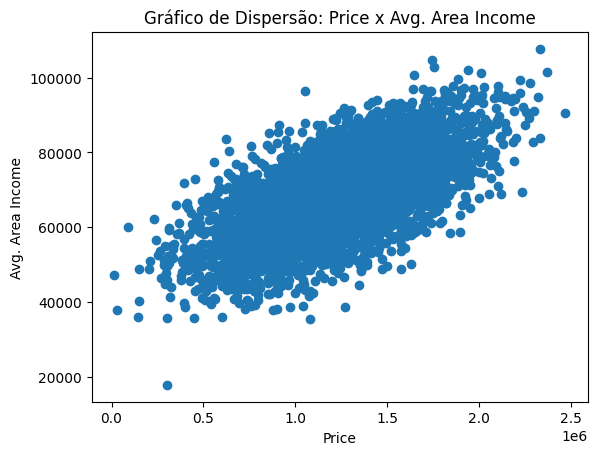

A correlação entre Price e Avg. Area Income é ALTA. r: 0.639733778249894


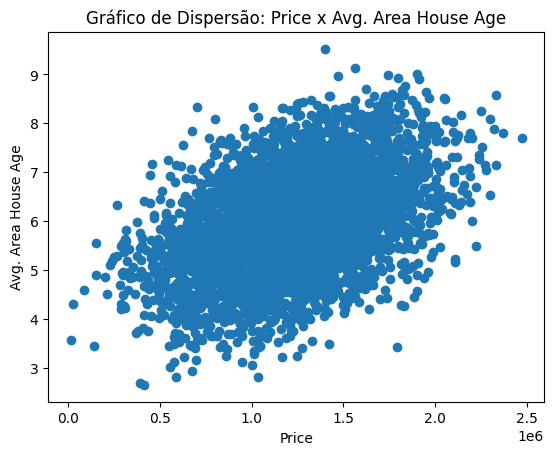

A correlação entre Price e Avg. Area House Age é MODERADA. r: 0.45254253717875587


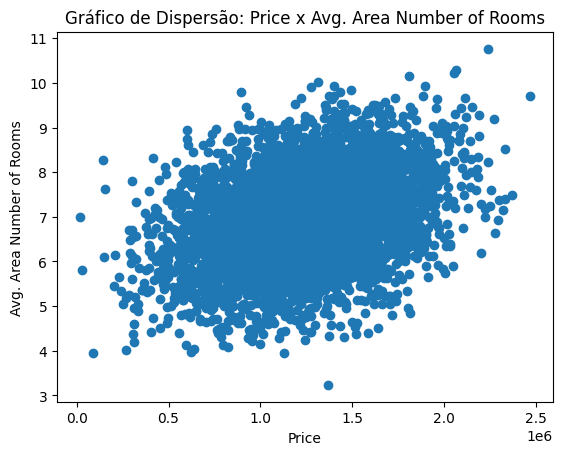

A correlação entre Price e Avg. Area Number of Rooms é MODERADA. r: 0.33566445336675976


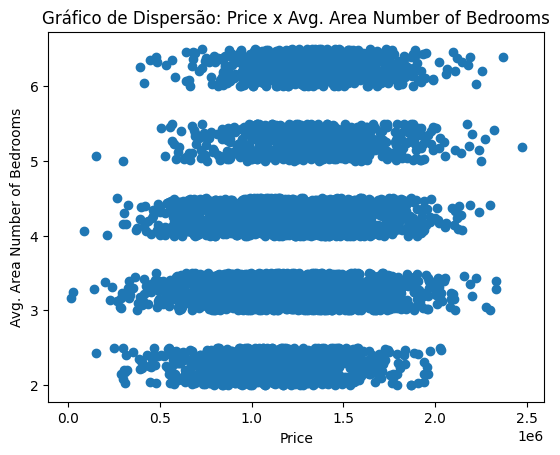

A correlação entre Price e Avg. Area Number of Bedrooms é BAIXA. r: 0.17107102765855592


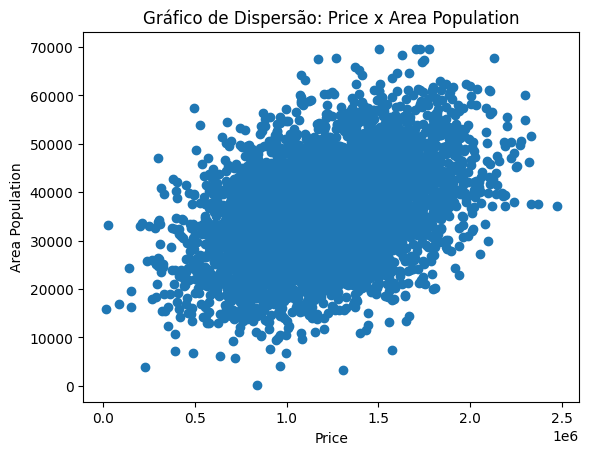

A correlação entre Price e Area Population é MODERADA. r: 0.4085558793165563


In [72]:
preco = tabela['Price']
for x in tabela.columns:
    if(not(x in ['Price','ACRON'])):
        coluna = tabela[x]
        plt.scatter(preco, coluna)
        plt.title("Gráfico de Dispersão: Price x "+x)
        plt.xlabel("Price")
        plt.ylabel(x)
        plt.show()

        r = np.corrcoef(preco, coluna)[0, 1]
        print(f"A correlação entre Price e {x} é {calculaClasseCorrelacao(r)}")
    

### Analisando nossas hipóteses

##### O número de quartos influencia mais no preço da casa do que o número de banheiros?

**R:** Sim. Quando comparamos as correlações, a correlação do número de banheiros é muito menor que a de número de quartos. No entendo, a influência do número de quartos no preço da casa é considerada baixa ainda, pois sua coorelação entra na classe das Moderadas.

##### A população que mora na área influencia no preço da casa?

**R:** A influência é considerada Moderada. Por tanto, o número de pessoas que moram nas redondezas não influencia tanto no preço da casa.

##### A renda das pessoas influencia na idade das casas?

**R:** Sim! Este foi o atributo que mais teve correlação com o preço (r: 0.639733778249894, correlação ALTA)

##### New York é o estado mais caro para se viver

**R:** Não. O estado mais caro dentre os aparesentados foi o Alaska e o Texas

### Conclusões

Concluímos que dentre esses dados, nenhum obteve uma correlação muito alta ou quase perfeita, o que seria ideal para demonstrar a influência desses atributos no preço do imóvel.

O atributo de renda da população ao redor acabou sendo o que influenciou mais dentre os listados.

O número de quartos foi o que se mostrou o menos relevante influenciador do peso.

Os demais atributos tiveram uma correlação moderada.
